# 1. Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from matplotlib.pyplot import cm
import numpy as np
import seaborn as sns
%matplotlib inline

# 2. Importing the data through quandl API


### 2.1 All Employees: Total Nonfarm Payrolls
source: [FRED](https://www.quandl.com/data/FRED/PAYEMS-All-Employees-Total-Nonfarm-Payrolls) - Accessed via personal quandl API account.

In [ ]:
nfp = quandl.get("FRED/PAYEMS", authtoken="nPJTgF6X2H2LLcDqJ8W8", index = True)
nfp.reset_index(inplace = True)
nfp.head()

### 2.2 Gross wages and salaries: households and NPISH Country: European Union (15 countries):
source : [EU Commission Annual Macro Database](https://www.quandl.com/data/AMECO/EU15_1_0_99_0_UWSH-Gross-wages-and-salaries-households-and-NPISH-Mrd-ECU-EUR-Standard-aggregation-European-Union-15-countries) - Accessed via personal quandl API account.

In [19]:
seu = quandl.get("AMECO/EU15_1_0_99_0_UWSH", authtoken = "nPJTgF6X2H2LLcDqJ8W8")
seu.reset_index(inplace = True)
seu.head()

### 2.3 Wage and salaried workers, total (% of total employed) - East Asia & Pacific (developing only).
source : [World Bank](https://www.quandl.com/data/WWDI/EAP_SL_EMP_WORK_ZS-Wage-and-salaried-workers-total-of-total-employed-East-Asia-Pacific-developing-only) - Accessed via personal quandl API account.

In [18]:
eap = quandl.get("WWDI/EAP_SL_EMP_WORK_ZS", authtoken="nPJTgF6X2H2LLcDqJ8W8")
eap.reset_index(inplace = True)
eap.head()

Now that we have 3 datasets that give us a clear indication of salary levels across 3 major markets: North American, European  & Asian. Let's now merge the 3 datasets into a unique dataset by using the "Date" parameter as an index.
Let's try to find a starting point for our dataset by reviewing the timelines of each of the 3 separate databases:

In [25]:
nfp.head()

,Date,Value
0,1939-01-01,29923.0
1,1939-02-01,30100.0
2,1939-03-01,30280.0
3,1939-04-01,30094.0
4,1939-05-01,30299.0


In [26]:
seu.head()

,Date,Value
0,1999-12-31,3279.442
1,2000-12-31,3526.697
2,2001-12-31,3677.134
3,2002-12-31,3790.711
4,2003-12-31,3816.880


In [27]:
eap.head()

,Date,Value
0,1991-12-31,31.530660
1,1992-12-31,32.617429
2,1993-12-31,34.704702
3,1994-12-31,36.531395
4,1995-12-31,38.396728


We notice that the latest starting date of each of the 3 dataframes is "1999-12-31" (EU wage salaries). This makes sense as both EU and Euro as a currency do not date back as far in the past. 

We now merge the 3 datasets using the EU wages's timeline as an index:

In [43]:
seu["Date"] = seu["Date"] + np.timedelta64(1,'D')
# We added one day to the EU dataframe to normalise the numbers across the two datasets:
# One can notice that the EU dataset is always realeased at month's and meanwhile the US at month's start

In [50]:
new_df = seu.merge(nfp, how = "left", on = "Date")
# Again we have to normalise the date for merging purposes:

new_df["Date"] = new_df["Date"] - np.timedelta64(1,'D')
final_df = new_df.merge(eap,how = "left", on = "Date")

In [52]:
final_df.head()

,Date,Value_x,Value_y,Value
0,1999-12-31,3279.442,131020.0,41.414897
1,2000-12-31,3526.697,132712.0,42.047554
2,2001-12-31,3677.134,130868.0,42.861365
3,2002-12-31,3790.711,130596.0,43.633658
4,2003-12-31,3816.880,130787.0,44.809019


We now rename our 3 datasets according to their respective markets:
    - Value_x = EU
    - Value_y = US
    - Value = DM (Developing Markets)

In [58]:
final_df.rename(columns = {"Value_x":"EU", "Value_y":"US","Value":"DM"}, inplace = True)

In [59]:
final_df.head()

,Date,EU,US,Developing Markets
0,1999-12-31,3279.442,131020.0,41.414897
1,2000-12-31,3526.697,132712.0,42.047554
2,2001-12-31,3677.134,130868.0,42.861365
3,2002-12-31,3790.711,130596.0,43.633658
4,2003-12-31,3816.880,130787.0,44.809019


Now we need to use the vectorised properties of a Dataframe to calculate the percentage change year on year:

In [62]:
final_df["Pct_change EU"] = final_df["EU"].pct_change()
final_df["Pct_change US"] = final_df["US"].pct_change()
final_df["Pct_change DM"] = final_df["Developing Markets"].pct_change()

In [64]:
final_df.head()

,Date,EU,US,Developing Markets,Pct_change EU,Pct_change US,Pct_change DM
0,1999-12-31,3279.442,131020.0,41.414897,NaN,NaN,NaN
1,2000-12-31,3526.697,132712.0,42.047554,0.075395,0.012914,0.015276
2,2001-12-31,3677.134,130868.0,42.861365,0.042657,-0.013895,0.019355
3,2002-12-31,3790.711,130596.0,43.633658,0.030887,-0.002078,0.018018
4,2003-12-31,3816.880,130787.0,44.809019,0.006903,0.001463,0.026937


We are now left with graphically analysing the properties of the percentage changes in each market and see whether a slowdown has happened during 2018.

# 2.4 Data Visualisation

In [78]:
plot_df = final_df[["Pct_change EU", "Pct_change US" ,"Pct_change DM"]]

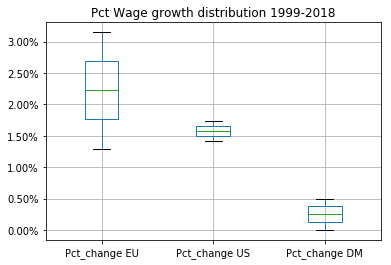

In [94]:
ax  = plot_df.boxplot()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title("Pct Wage growth distribution 1999-2018")
plt.show()

In [88]:
plot_df = final_df[["Date", "Pct_change EU", "Pct_change US" ,"Pct_change DM"]]
plot_df = plot_df[plot_df["Date"] > "2015-12-31"]

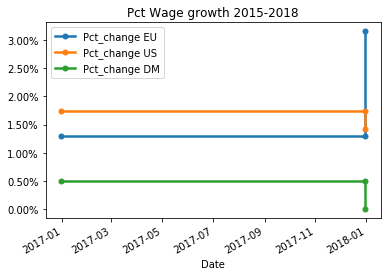

In [96]:
ax = plot_df.plot(kind = "line" , x = "Date",linestyle='-', linewidth=2.5, drawstyle ="steps-post", marker = "." ,markersize=10)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title("Pct Wage growth 2015-2018")
plt.show()


In [97]:
final_df.tail()

,Date,EU,US,Developing Markets,Pct_change EU,Pct_change US,Pct_change DM
14,2013-12-31,4763.096,137567.0,56.976324,0.004291,0.016883,0.008848
15,2014-12-31,4906.134,140609.0,57.727242,0.030030,0.022113,0.013179
16,2015-12-31,5158.365,143215.0,58.538491,0.051411,0.018534,0.014053
17,2016-12-31,5225.333,145695.0,58.831554,0.012982,0.017317,0.005006
18,2017-12-31,5389.858,147767.0,58.831692,0.031486,0.014221,0.000002


# 3. BIC KEY Figures:
source [BIC Investor Kit](https://www.bicworld.com/en/investors/key-figures) - Manually extracted each data entry from the website.

### 3.1 Net Sales by Region:

In [101]:
d = {"Date": ["2016", "2017", "2018"], 'EU_Net Sales(Mi$)': [545, 559, 560], 'NorthAmerica_Net Sales(Mi$)': [812, 784, 766],'DevelopingMarkets_Net Sales(Mi$)': [669, 677,625]}
df = pd.DataFrame(d)
df

,Date,EU_Net Sales(Mi$),NorthAmerica_Net Sales(Mi$),DevelopingMarkets_Net Sales(Mi$)
0,2016,545,812,669
1,2017,559,784,677
2,2018,560,766,625


In [114]:
df["Pct_change EU"] = df["EU_Net Sales(Mi$)"].pct_change()
df["Pct_change NA"] = df["NorthAmerica_Net Sales(Mi$)"].pct_change()
df["Pct_change DM"] = df["DevelopingMarkets_Net Sales(Mi$)"].pct_change()

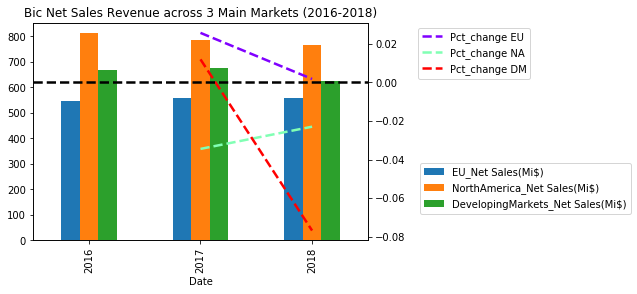

In [143]:
ax = df.plot(kind = "bar", x = "Date", y = ["EU_Net Sales(Mi$)", "NorthAmerica_Net Sales(Mi$)", "DevelopingMarkets_Net Sales(Mi$)"], legend = True)
plt.legend(loc = "lower right", bbox_to_anchor=(1.3, 0.1, 0.5, 0.5))
ax2 = ax.twinx()
df.plot(kind = "line", x = "Date", y=["Pct_change EU","Pct_change NA", "Pct_change DM"], ax=ax2, legend=False, color = cm.rainbow(np.linspace(0,1,3)) , linewidth = 2.5, linestyle = "--")
plt.axhline(0.0, color = "k" , linewidth = 2.5, linestyle = "--")


plt.legend(loc = "best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.title("Bic Net Sales Revenue across 3 Main Markets (2016-2018)")
plt.show()

### 3.2 Net Sales by Category:

We repeat the same procedure as we did for the Net sales by Region dataset.

In [145]:
data = {"Date": ["2016", "2017", "2018"], 
        'Stationery_Net_Sales(Mi$)': [771.9, 791.8, 780.3], 
        'Lighters_Net_Sales(Mi$)': [685.8, 703.9, 696.4],
        'Shavers_Net_Sales(Mi$)': [438.0, 454.4,467.0], 
        'Other_Products_Net_Sales(Mi$)': [54.0, 70.2, 82.1]}
df = pd.DataFrame(data)
df

,Date,Stationery_Net_Sales(Mi$),Lighters_Net_Sales(Mi$),Shavers_Net_Sales(Mi$),Other_Products_Net_Sales(Mi$)
0,2016,771.9,685.8,438.0,54.0
1,2017,791.8,703.9,454.4,70.2
2,2018,780.3,696.4,467.0,82.1


In [147]:
df["Pct_change Stationery"] = df["Stationery_Net_Sales(Mi$)"].pct_change()
df["Pct_change Lighters"] = df["Lighters_Net_Sales(Mi$)"].pct_change()
df["Pct_change Shavers"] = df["Shavers_Net_Sales(Mi$)"].pct_change()
df["Pct_change Other Products"] = df["Other_Products_Net_Sales(Mi$)"].pct_change()


In [155]:
df

,Date,Stationery_Net_Sales(Mi$),Lighters_Net_Sales(Mi$),Shavers_Net_Sales(Mi$),Other_Products_Net_Sales(Mi$),Pct_change Stationery,Pct_change Lighters,Pct_change Shavers,Pct_change Other Products
0,2016,771.9,685.8,438.0,54.0,NaN,NaN,NaN,NaN
1,2017,791.8,703.9,454.4,70.2,0.025781,0.026393,0.037443,0.300000
2,2018,780.3,696.4,467.0,82.1,-0.014524,-0.010655,0.027729,0.169516


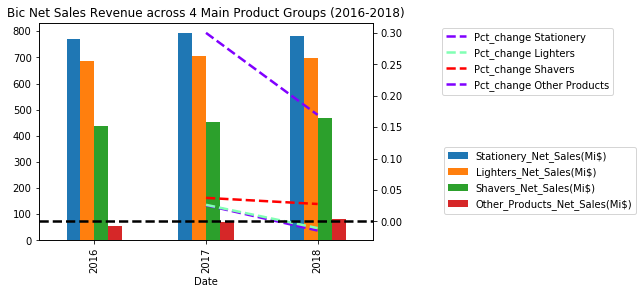

In [154]:
ax = df.plot(kind = "bar", x = "Date", y = ["Stationery_Net_Sales(Mi$)", "Lighters_Net_Sales(Mi$)", "Shavers_Net_Sales(Mi$)", "Other_Products_Net_Sales(Mi$)" ], legend = True)
plt.legend(loc = "lower right", bbox_to_anchor=(1.3, 0.1, 0.5, 0.5))
ax2 = ax.twinx()
df.plot(kind = "line", x = "Date", y=["Pct_change Stationery","Pct_change Lighters", "Pct_change Shavers", "Pct_change Other Products"], ax=ax2, legend=False, color = cm.rainbow(np.linspace(0,1,3)) , linewidth = 2.5, linestyle = "--")
plt.axhline(0.0, color = "k" , linewidth = 2.5, linestyle = "--")


plt.legend(loc = "best", bbox_to_anchor=(1.23, 0.5, 0.5, 0.5))
plt.title("Bic Net Sales Revenue across 4 Main Product Groups (2016-2018)")
plt.show()

## 4. BIC Daily Share Price - 2014/02/14 to date
source : [Euro Stock Exchange](https://www.quandl.com/data/EURONEXT/BB-Bic-BB) - Accessed via personal quandl API account.

In [114]:
Bic = quandl.get("EURONEXT/BB", authtoken="nPJTgF6X2H2LLcDqJ8W8")
Bic.reset_index(inplace = True)
Bic.rename(columns = {"Open":"Daily Opening Share Price","Turnover" : "Daily Share Turnover" }, inplace = True)
Bic.head()

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover
0,2014-02-14,91.27,91.51,90.58,91.23,56557.0,5150866.90
1,2014-02-17,91.09,93.24,90.75,91.52,94680.0,8713499.18
2,2014-02-18,91.52,91.97,90.75,91.64,35716.0,3264984.00
3,2014-02-19,91.73,92.36,91.00,91.35,42901.0,3925229.81
4,2014-02-20,91.00,92.69,90.67,92.67,66093.0,6092367.70


In [115]:
Bic.dtypes

Date                         datetime64[ns]
Daily Opening Share Price           float64
High                                float64
Low                                 float64
Last                                float64
Volume                              float64
Daily Share Turnover                float64
dtype: object

### 4.1 Lowest Share Price

In [116]:
Bic["Daily Opening Share Price"].min()

72.0

In [117]:
Bic[Bic["Daily Opening Share Price"] == 72]

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover
1162,2018-10-11,72.0,73.3,71.8,72.25,124722.0,9041358.85


### 4.2 Highest Share Price

In [118]:
Bic["Daily Opening Share Price"].max()

161.55

In [119]:
Bic[Bic["Daily Opening Share Price"] == 161.55]

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover
346,2015-08-04,161.55,162.0,158.2,159.45,31936.0,5095252.0


### 4.3 Intraday Stock Volatility

We compound the intraday volatility of the stock by using the "High" and "Low" columns. Because we are interested in the range of the the two values per each day rather than the subtracting one of it we express our function as follows:

In [120]:
Bic["Intraday Stock Volatility"] = Bic["High"] - Bic["Low"]

Now let's calculate the rolling monthly average of intraday stock volatility for each year. We start from 2015 as we have not the entire year for 2014. 

In [121]:
Bic = Bic[Bic["Date"] > "2015-01-01"]

In [122]:
Bic.head()

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover,Intraday Stock Volatility
209,2015-01-02,110.40,110.6,109.15,109.60,23883.0,2623192.10,1.45
210,2015-01-05,109.45,110.0,108.65,108.75,35406.0,3862939.30,1.35
211,2015-01-06,109.00,109.0,107.30,107.50,29276.0,3157524.70,1.70
212,2015-01-07,108.00,108.0,105.40,106.20,61258.0,6519004.30,2.60
213,2015-01-08,106.15,110.0,106.15,109.50,46187.0,5023047.45,3.85


In [123]:
monthly_days = 256/12
window = int(monthly_days)
#We estimated the average trading days for a month by dividing the total trading days in a year (256) by 12 months.

In [124]:
Bic["Rolling Monthly Intraday Volatility Average"] = Bic["Intraday Stock Volatility"].rolling(window).mean()

The result:

In [125]:
Bic.head()

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover,Intraday Stock Volatility,Rolling Monthly Intraday Volatility Average
209,2015-01-02,110.40,110.6,109.15,109.60,23883.0,2623192.10,1.45,NaN
210,2015-01-05,109.45,110.0,108.65,108.75,35406.0,3862939.30,1.35,NaN
211,2015-01-06,109.00,109.0,107.30,107.50,29276.0,3157524.70,1.70,NaN
212,2015-01-07,108.00,108.0,105.40,106.20,61258.0,6519004.30,2.60,NaN
213,2015-01-08,106.15,110.0,106.15,109.50,46187.0,5023047.45,3.85,NaN


Now we extract all the trading days were the value for "Rolling Monthly Intraday Volatility Average" is not NaN

In [130]:
Bic = Bic[Bic["Rolling Monthly Intraday Volatility Average"].notna()]
Bic.head()

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover,Intraday Stock Volatility,Rolling Monthly Intraday Volatility Average
229,2015-01-30,124.65,126.55,124.50,126.00,64509.0,8115470.600,2.05,2.207143
230,2015-02-02,126.05,126.35,122.45,123.55,53632.0,6651568.833,3.90,2.323810
231,2015-02-03,123.85,125.45,123.45,125.15,50889.0,6351610.200,2.00,2.354762
232,2015-02-04,125.00,126.15,124.65,126.15,40453.0,5081026.300,1.50,2.345238
233,2015-02-05,125.85,127.10,125.70,126.45,32190.0,4067833.300,1.40,2.288095


As we expected the timeseries now starts from the end of the first month of January. We are left with visualising the findings graphically.

### 4.4 Data Visualisation

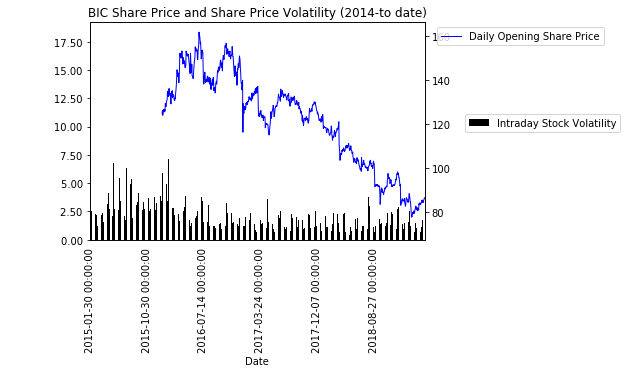

In [143]:
ax = Bic.plot(kind = "bar", x = "Date", y= "Intraday Stock Volatility", legend = True, color = "black")
plt.legend(loc = "best", bbox_to_anchor=(1.1, 0.1, 0.5, 0.5))
ax2 = ax.twinx()
Bic.plot(kind = "line", y = "Daily Opening Share Price", ax=ax2, legend=False, color = "b" , linewidth = 1, linestyle = "-")

spacing = 180
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


ax.xaxis.set_ticks_position('none')


        
vals = ax.get_yticks()
ax.set_yticklabels(['{:20,.2f}'.format(x) for x in vals]) 

plt.legend(loc = "best", bbox_to_anchor=(1.05, 0.5, 0.5, 0.5))
plt.title("BIC Share Price and Share Price Volatility (2014-to date)")
plt.show()

In [153]:
Bic['mdate'] = [mdates.date2num(d) for d in Bic['Date']]
Bic.head()

,Date,Daily Opening Share Price,High,Low,Last,Volume,Daily Share Turnover,Intraday Stock Volatility,Rolling Monthly Intraday Volatility Average,date,mdate
229,2015-01-30,124.65,126.55,124.50,126.00,64509.0,8115470.600,2.05,2.207143,2015-01-30,735628.0
230,2015-02-02,126.05,126.35,122.45,123.55,53632.0,6651568.833,3.90,2.323810,2015-02-02,735631.0
231,2015-02-03,123.85,125.45,123.45,125.15,50889.0,6351610.200,2.00,2.354762,2015-02-03,735632.0
232,2015-02-04,125.00,126.15,124.65,126.15,40453.0,5081026.300,1.50,2.345238,2015-02-04,735633.0
233,2015-02-05,125.85,127.10,125.70,126.45,32190.0,4067833.300,1.40,2.288095,2015-02-05,735634.0


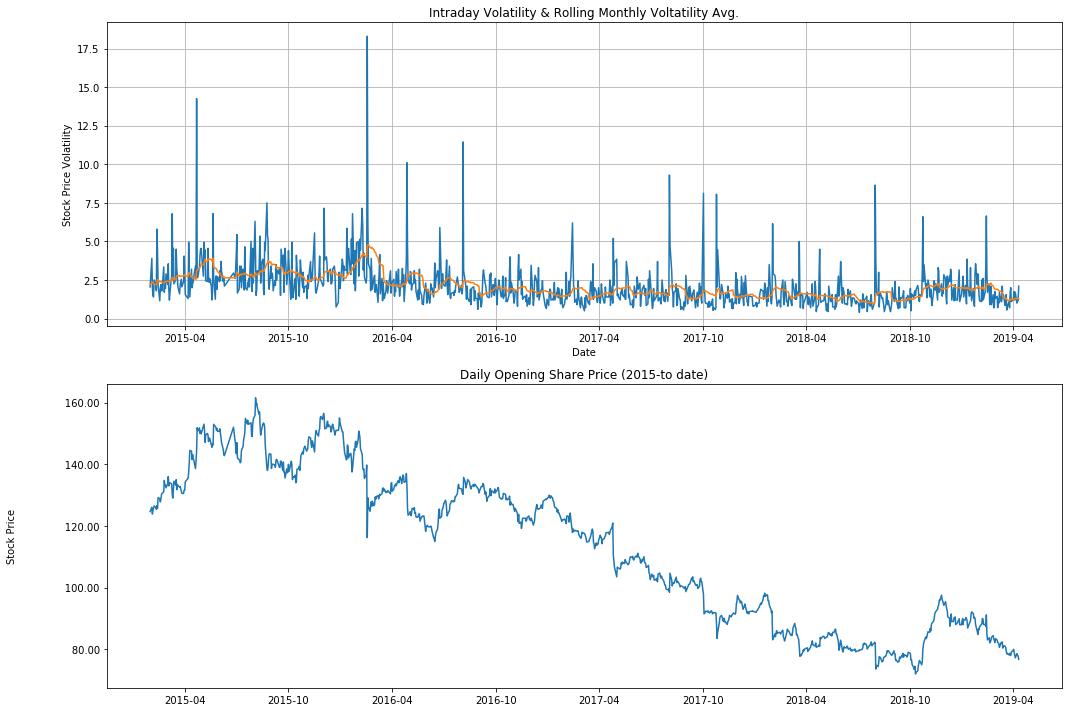

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


Bic['date'] = pd.to_datetime(Bic['Date'], unit='d')
Bic['mdate'] = [mdates.date2num(d) for d in Bic['Date']]

t = Bic["date"]
s1 = Bic["Intraday Stock Volatility"]
s2 = Bic["Rolling Monthly Intraday Volatility Average"]

fig, axs = plt.subplots(2, 1, figsize=(15,10))


axs[0].plot(t, s1, t, s2)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Stock Price Volatility')
axs[0].grid(True)
axs[0].set_title("Intraday Volatility & Rolling Monthly Voltatility Avg.")


f = axs[1].plot(t, Bic["Daily Opening Share Price"])
axs[1].set_ylabel('Stock Price')
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:20,.2f}'.format(x) for x in vals]) 

axs[1].set_title("Daily Opening Share Price (2015-to date)")

fig.tight_layout()

plt.show()